In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
data_path='./data1.xlsx'
data = pd.read_excel(data_path)
data['性别'] = data['性别'].apply(lambda x:1 if x == '男'  else 0)
data['获奖情况'] = data['获奖情况'].apply(lambda x: 1 if x == '校级奖学金' else (2 if x == '国家奖学金' else (3 if x == '社会奖学金' else 0)))
data.head()


,Unnamed: 0,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,...,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部,获奖情况
0,0,0,26,1,87.6327,1,72.15,4.0,0,18,...,1,0,0,0,0,0,0,0,0,1
1,1,0,26,2,89.9434,1,70.50,3.0,0,18,...,1,0,0,0,0,0,0,0,0,1
2,2,0,26,3,88.4667,1,NaN,NaN,0,18,...,1,0,0,0,0,0,0,0,0,1
3,3,1,52,2,86.3803,1,76.40,NaN,0,6,...,1,0,0,0,0,0,0,0,0,1
4,4,1,52,3,87.5455,1,NaN,5.0,0,6,...,1,0,0,0,0,0,0,0,0,1


In [3]:
X=data.iloc[:,1:25]
Y=data.iloc[:,25]

In [4]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: 获奖情况, dtype: int64

In [5]:
X.head()

,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,青学之星,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部
0,0,26,1,87.6327,1,72.15,4.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.50,3.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
2,0,26,3,88.4667,1,NaN,NaN,0,18,1,...,0,1,0,0,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.40,NaN,0,6,2,...,0,1,0,0,0,0,0,0,0,0
4,1,52,3,87.5455,1,NaN,5.0,0,6,2,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# X = X.drop('“双培计划”学习进步奖', axis=1)
# X = X.drop('青学之星', axis=1)
# X = X.drop('“双培计划”优秀学生干部', axis=1)
# X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

In [7]:
X.head()

,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,青学之星,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部
0,0,26,1,87.6327,1,72.15,4.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.50,3.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
2,0,26,3,88.4667,1,NaN,NaN,0,18,1,...,0,1,0,0,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.40,NaN,0,6,2,...,0,1,0,0,0,0,0,0,0,0
4,1,52,3,87.5455,1,NaN,5.0,0,6,2,...,0,1,0,0,0,0,0,0,0,0


In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=100)
x_train, x_test, y_train, y_test = X, X, Y, Y

In [9]:
xgb_train=xgb.DMatrix(x_train,label=y_train)
xgb_test=xgb.DMatrix(x_test,label=y_test)

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params={
    "max_depth":range(3, 10, 1),
    "min_child_weight":range(1, 6, 2),
}

bst = XGBClassifier(
    max_depth=7,
    min_child_weight=4,
    gamma= 0,
    subsample=0.8,
    colsample_bytree=0.8,
    # scale_pos_weight=1,
    learning_rate=0.1, 
    n_estimators=500,
    seed=1)
kfold = StratifiedKFold(n_splits=10, random_state=7,shuffle=True)
results = cross_val_score(bst, x_train, y_train, cv=kfold,scoring='f1_weighted')#对数据进行十折交叉验证--9份训练，一份测试
print(results)
print(results.mean())
# grid = GridSearchCV(bst, param_grid=params, cv=10, scoring='f1_weighted')
# grid.fit(x_train, y_train)

# print(grid.best_params_)
# print(grid.best_score_)

[0.8029123  0.82089492 0.8277368  0.80569714 0.82404157 0.82773746
 0.80908621 0.81145168 0.82044789 0.81182627]
0.8161832230417476


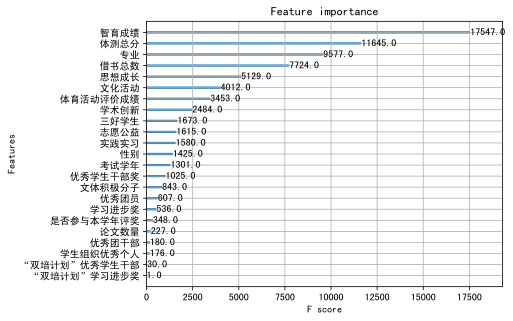

In [11]:
from xgboost import plot_importance #显示特征重要性
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams["font.sans-serif"] = ["SimHei"]
bst.fit(x_train, y_train)
plot_importance(bst)#打印重要程度结果。
plt.show()